In [117]:
import numpy as np 
import pandas as pd
import snapml

In [118]:
#getting data from kaggle
titanic_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [119]:
#checking the correlation
titanic_data.corr()

C:\Users\eren\AppData\Local\Temp\ipykernel_3724\1312813952.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [120]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
#checking data desciption
titanic_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [122]:
titanic_data.shape

(891, 12)

In [123]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Handling missing values

In [124]:
titanic_data.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [125]:
#we can't use cabin data because it is majority in the data set so i will use other attributes
#i want to change null age to mean age values

mean = titanic_data['Age'].mean()
titanic_data['Age'].replace(np.nan,mean,inplace=True)

#dropping the cabin column beacuse it affects aour data set without values
titanic_data.drop(['Cabin'], axis=1, inplace=True)

titanic_data.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [126]:
titanic_data.fillna({'Embarked':'S'},inplace=True)
titanic_data['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

## adding title feature set

In [127]:
titanic_data['Title'] = titanic_data['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
titanic_data.drop('Name', axis = 1 , inplace = True)
titanic_data['Title'] = titanic_data['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')
titanic_data['Title'].value_counts()

Mr         502
Miss       179
Mrs        121
NoTitle     49
Master      40
Name: Title, dtype: int64

In [128]:
#importing test split
from sklearn.model_selection import train_test_split

#to standartilise our data
from sklearn import preprocessing

#creating target variables
y = titanic_data.Survived

#creating feature set
features = ['Age','Fare','Parch','SibSp']

#differing categorical variables into diffrent columns to calculate better
X = pd.get_dummies(titanic_data[['Embarked','Sex','Pclass','Title']])
X = pd.concat([X,titanic_data[features]], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Embarked_C     891 non-null    uint8  
 2   Embarked_Q     891 non-null    uint8  
 3   Embarked_S     891 non-null    uint8  
 4   Sex_female     891 non-null    uint8  
 5   Sex_male       891 non-null    uint8  
 6   Title_Master   891 non-null    uint8  
 7   Title_Miss     891 non-null    uint8  
 8   Title_Mr       891 non-null    uint8  
 9   Title_Mrs      891 non-null    uint8  
 10  Title_NoTitle  891 non-null    uint8  
 11  Age            891 non-null    float64
 12  Fare           891 non-null    float64
 13  Parch          891 non-null    int64  
 14  SibSp          891 non-null    int64  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 43.6 KB


**SAMPLİNG DATA TO Distribute weights**

0    549
1    342
Name: Survived, dtype: int64
0    549
1    549
Name: Survived, dtype: int64


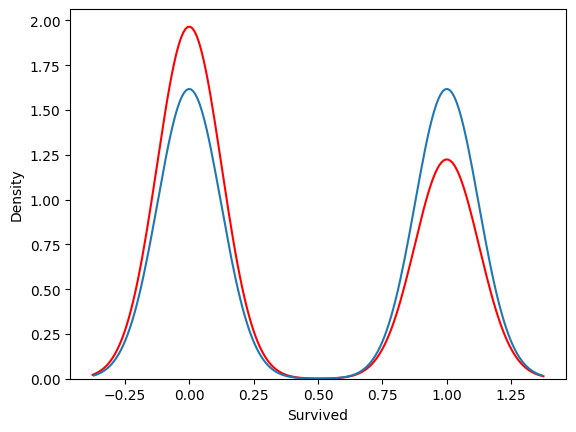

In [129]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
smote = SMOTE( random_state=42)

print(y.value_counts())
X_resampled, y_resampled = smote.fit_resample(X,y)
print(y_resampled.value_counts())

sns.kdeplot(y, label = "Original" , color = 'red')
sns.kdeplot(y_resampled, label = "Modified")
X = X_resampled
y = y_resampled

In [130]:
#standarting our data 
transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)

#splitting the data
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state=1)

In [131]:
#trying support vector machine
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

clf = svm.SVC(kernel='rbf')
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)

print('f1 score:',f1_score(test_y, predictions, average='weighted')) 
print('accuracy score: ',accuracy_score(test_y,predictions))

f1 score: 0.8423605731128506
accuracy score:  0.8424242424242424


In [132]:
#trying diffrent k nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score

KNN = KNeighborsClassifier(n_neighbors=3).fit(train_x,train_y)
predictions = KNN.predict(test_x)

KNN_Accuracy_Score = accuracy_score(predictions,test_y)
KNN_JaccardIndex = jaccard_score(predictions,test_y)
KNN_F1_Score = f1_score(predictions,test_y)

print('ACCURACY SCORE OF THE MODEL IS : ',KNN_Accuracy_Score)
print('JACCARD INDEX FOR MODEL IS: ', KNN_JaccardIndex)
print('F1 VALUE FOR MODEL IS : ', KNN_F1_Score)

ACCURACY SCORE OF THE MODEL IS :  0.8333333333333334
JACCARD INDEX FOR MODEL IS:  0.7222222222222222
F1 VALUE FOR MODEL IS :  0.8387096774193549


## trying IBM's snapml library for faster results

In [133]:
import snapml.SupportVectorMachine
from sklearn.model_selection import GridSearchCV
#i am tuning this model using sklearn's gridsearchcv
model = snapml.SupportVectorMachine()

parameters = {'kernel':['linear', 'rbf'],'gamma':np.logspace(-2,2,10),'loss':['hinge','squared_hinge'],'class_weight':['balanced',None],
              'n_components':[100,150,200,300],
                                                                       }

model_cv = GridSearchCV(model,parameters,refit=True,n_jobs=10,cv=20)
model_cv.fit(train_x,train_y)

GridSearchCV(cv=20, estimator=SupportVectorMachine(), n_jobs=10,
             param_grid={'class_weight': ['balanced', None],
                         'gamma': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'kernel': ['linear', 'rbf'],
                         'loss': ['hinge', 'squared_hinge'],
                         'n_components': [100, 150, 200, 300]})

In [134]:
model_cv.best_params_

{'class_weight': None,
 'gamma': 0.027825594022071243,
 'kernel': 'rbf',
 'loss': 'squared_hinge',
 'n_components': 300}

In [135]:
model_cv.best_score_

0.8635290148448045

In [136]:
#as we can see te best score for this model is above i have to use that parameters to predict
#i can use all x data to improve model again
model_cv.fit(X,y)

GridSearchCV(cv=20, estimator=SupportVectorMachine(), n_jobs=10,
             param_grid={'class_weight': ['balanced', None],
                         'gamma': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'kernel': ['linear', 'rbf'],
                         'loss': ['hinge', 'squared_hinge'],
                         'n_components': [100, 150, 200, 300]})

In [137]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [138]:
#preparing test data
test_data['Title'] = test_data['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
test_data.drop('Name', axis = 1 , inplace = True)
test_data['Title'] = test_data['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')

final_test_x = pd.get_dummies(test_data[['Embarked','Sex','Pclass','Title']])
final_test_x = pd.concat([final_test_x,test_data[features]], axis=1)
#standarding our test data

mean = final_test_x['Age'].mean()
final_test_x['Age'].replace(np.nan,mean,inplace=True)
mean = final_test_x['Fare'].mean()
final_test_x['Fare'].replace(np.nan,mean,inplace=True)
final_test_x.info()


transform = preprocessing.StandardScaler()

final_test_x = transform.fit_transform(final_test_x)

#making predictions
y_predictions = model_cv.predict(final_test_x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Embarked_C     418 non-null    uint8  
 2   Embarked_Q     418 non-null    uint8  
 3   Embarked_S     418 non-null    uint8  
 4   Sex_female     418 non-null    uint8  
 5   Sex_male       418 non-null    uint8  
 6   Title_Master   418 non-null    uint8  
 7   Title_Miss     418 non-null    uint8  
 8   Title_Mr       418 non-null    uint8  
 9   Title_Mrs      418 non-null    uint8  
 10  Title_NoTitle  418 non-null    uint8  
 11  Age            418 non-null    float64
 12  Fare           418 non-null    float64
 13  Parch          418 non-null    int64  
 14  SibSp          418 non-null    int64  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 20.5 KB


In [139]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': y_predictions})
output.to_csv('submission.csv', index=False)

In [140]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


from sklearn.ensemble import RandomForestClassifier
#use “balanced_subsample”
rand_f = RandomForestClassifier(class_weight='balanced_subsample')
rand_f.fit(X,y)
y_predictions = rand_f.predict(final_test_x)
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': y_predictions})
output.to_csv('submission.csv', index=False)